In [5]:
import os, sys
os.chdir(sys.path[0])
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
from src.ssa.ssa import *
from data.load import *
import numpy as np

In [6]:
# 设置相关参数 
L = 50             # 窗口长度
fs = 2         # 采样频率
num = 500
t = np.arange(0, num)
t = t/fs
omega = 0.96     # 正弦周期
x = np.sin(2*np.pi*omega*t)
model = SSA(L, 1, 1)
model.embedding(x)
model.decomposition_safe()

 相空间维度： 50
 相空间轨迹点个数： 451
 轨迹矩阵的秩： 2


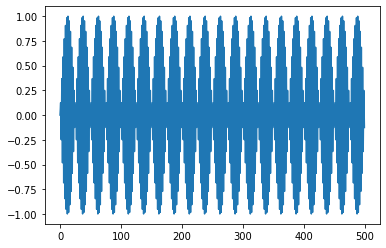

In [7]:
# plot_series_array(x, model.components_series)
plot_series(x, np.sum(model.components_series[0:1], axis=0))

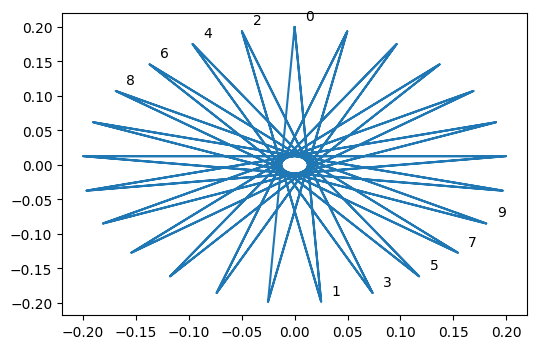

In [8]:
txt = [str(i) for i in range(len(model.eigenvector_left[:, 0]))]
a = model.eigenvector_left[:, 0]
b = model.eigenvector_left[:, 1]
plt.figure(dpi=100)
plt.plot(a, b)
for i in range(10):
    plt.annotate(txt[i], xy = (a[i], b[i]), xytext = (a[i]+0.01, b[i]+0.01))
plt.show()

In [9]:
# 估计频率
angle = polar_angle(model.eigenvector_left[:, 0:1], model.eigenvector_left[:, 1:2])
omega_estimation = freq_estimation(model.eigenvector_left[:, 0:1], model.eigenvector_left[:, 1:2])
print("估计值: ", omega_estimation*fs)
print("真 值: ", omega)

估计值:  1.04
真 值:  0.96


In [10]:
omega_estimation = []
omega_true = []
for omega in np.arange(0.01, 4, 0.02):
    fs = 2          # 采样频率
    num = 1000
    t = np.arange(0, num)
    t = t/fs
    x = np.sin(2*np.pi*omega*t)
    model = SSA(L, 1, 1)
    model.embedding(x)
    model.decomposition_safe()
    omega_estimation.append(freq_estimation(model.eigenvector_left[:, 0:1], model.eigenvector_left[:, 1:2])*fs)
    omega_true.append(omega)

 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 2
 

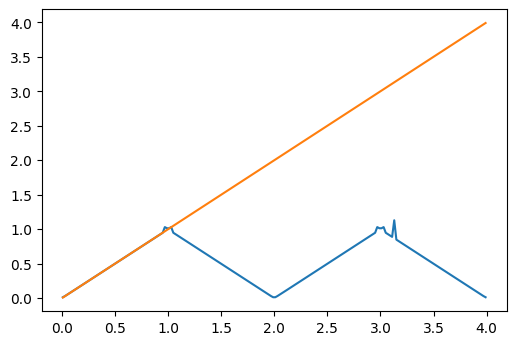

In [11]:
plt.figure(dpi=100)
plt.plot(omega_true, omega_estimation)
plt.plot(omega_true, omega_true)
plt.show()